Predicting Airline Passenger Satisfaction using Machine Learning Techniques.
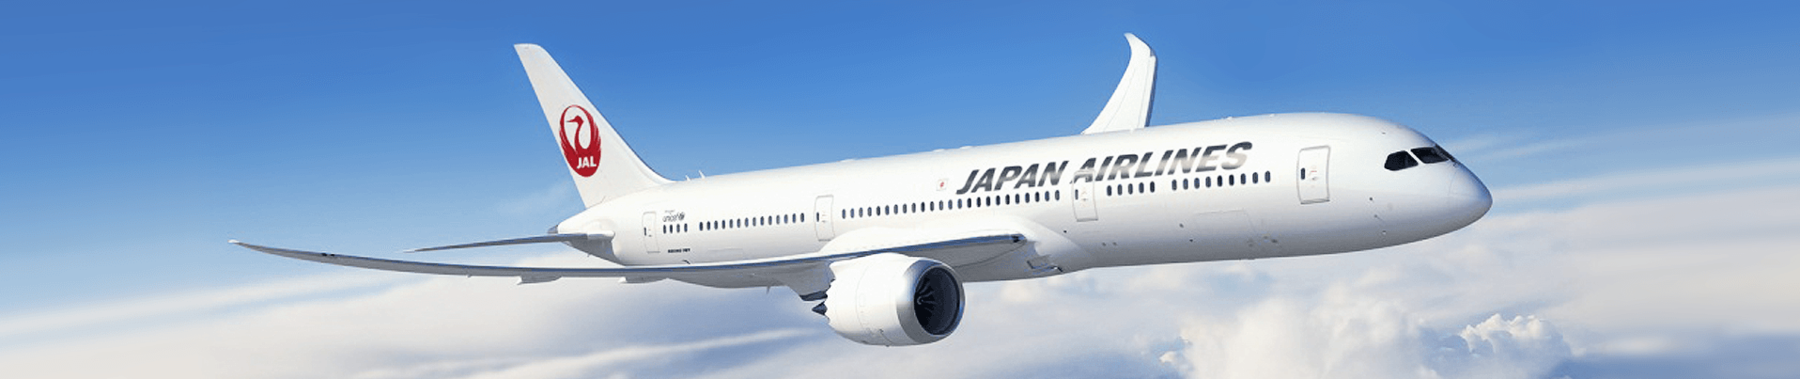

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

#Import libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

##Load and Audit the data

In [74]:
train= pd.read_csv('/content/train.csv')

In [75]:
test =pd.read_csv('/content/test.csv')

##Data preparation and Data transformation

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [77]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


To check for missisng values

In [78]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Arrival Delay in Minutes is the only column where we have missing values.


In [79]:
train['Arrival Delay in Minutes'].fillna(value=train['Arrival Delay in Minutes'].median(axis=0),inplace=True)

To handle missing values ,I used fillna method and replaced the missing values with the median value of the column.

In [80]:
train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

To check for outliers

In [81]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [82]:
train.skew()

<ipython-input-82-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


Unnamed: 0                           0.000000
id                                   0.002864
Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Arrival Delay in Minutes             6.605288
dtype: float64

Flight Distance,Departure Delay in Minutes and Arrival Delay in Minutes are those variables which are postively skewed.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38ca5d97c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38ca628eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38ca5d9910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38ca628400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38ca6289d0>],
 'means': []}

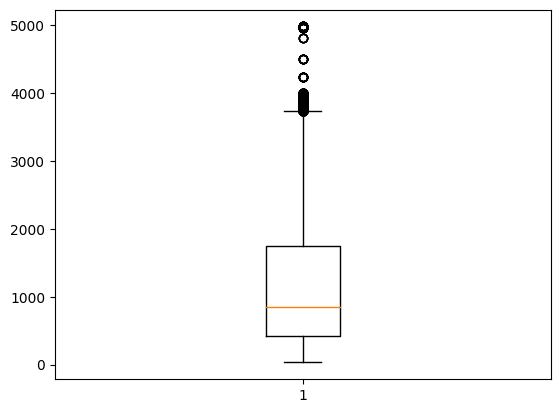

In [83]:
plt.boxplot(train['Flight Distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38ca6aba60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38ca6eaac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38ca6abf70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38ca6ea5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38ca6ea340>],
 'means': []}

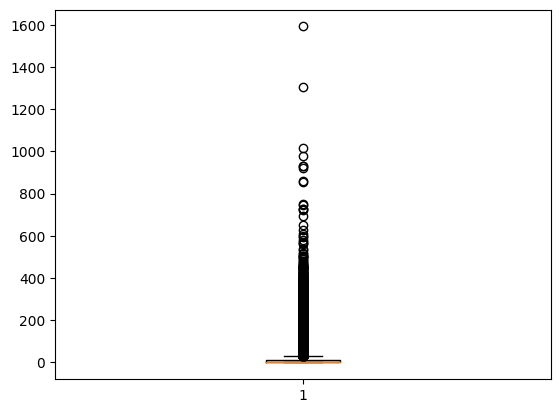

In [84]:
plt.boxplot(train['Departure Delay in Minutes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38ca747580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38ca7476a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38ca789d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38ca747730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38ca747df0>],
 'means': []}

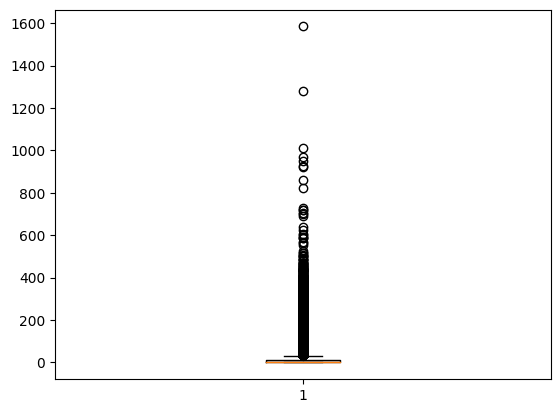

In [85]:
plt.boxplot(train['Arrival Delay in Minutes'])

we used boxplot to check outliers

In [86]:
colm =['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'] 

In [87]:
Q1 = train[colm].quantile(0.25)
Q3 = train[colm].quantile(0.75)
IQR = Q3 - Q1

((train[colm] < (Q1 - 1.5 * IQR)) | (train[colm] > (Q3 + 1.5 * IQR))).sum()

Flight Distance                2291
Departure Delay in Minutes    14529
Arrival Delay in Minutes      13954
dtype: int64

For Departure Delay in Minutes and Arrival Delay in Minutes, we have a large number of data points in the outliers. Therefore, if we remove them, we would lose approximately 10-15% of the data, so we have decided to leave them as they are. However, for Flight Distance, the number of outliers is relatively less, so we will handle them with interquartile range.

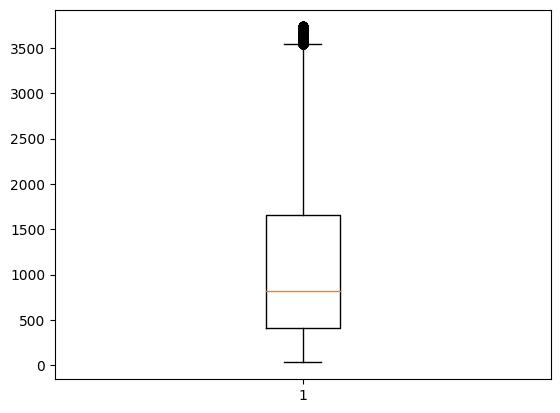

In [88]:
Q1 = train['Flight Distance'].quantile(0.25)
Q3 = train['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
filt = (train['Flight Distance'] >= Q1 - 1.5*IQR) & (train['Flight Distance'] <= Q3 + 1.5*IQR)
train_filtered = train.loc[filt]

plt.boxplot(train_filtered['Flight Distance'])
plt.show()


Dropping the unwanted columns.

In [89]:
train.drop(['Unnamed: 0','id'],axis =1,inplace=True)

Unnamed:0 represents the index of the data, and id represents the identification number of the people who traveled. Other than those two columns, all the other columns are important.

In [90]:
def encode(train):
  le = LabelEncoder()
  for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = le.fit_transform(train[i])
  return train


Encoding the variables whose datatype is an object because machine learning models can only handle numeric data.

In [91]:
encode(train)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


<Axes: >

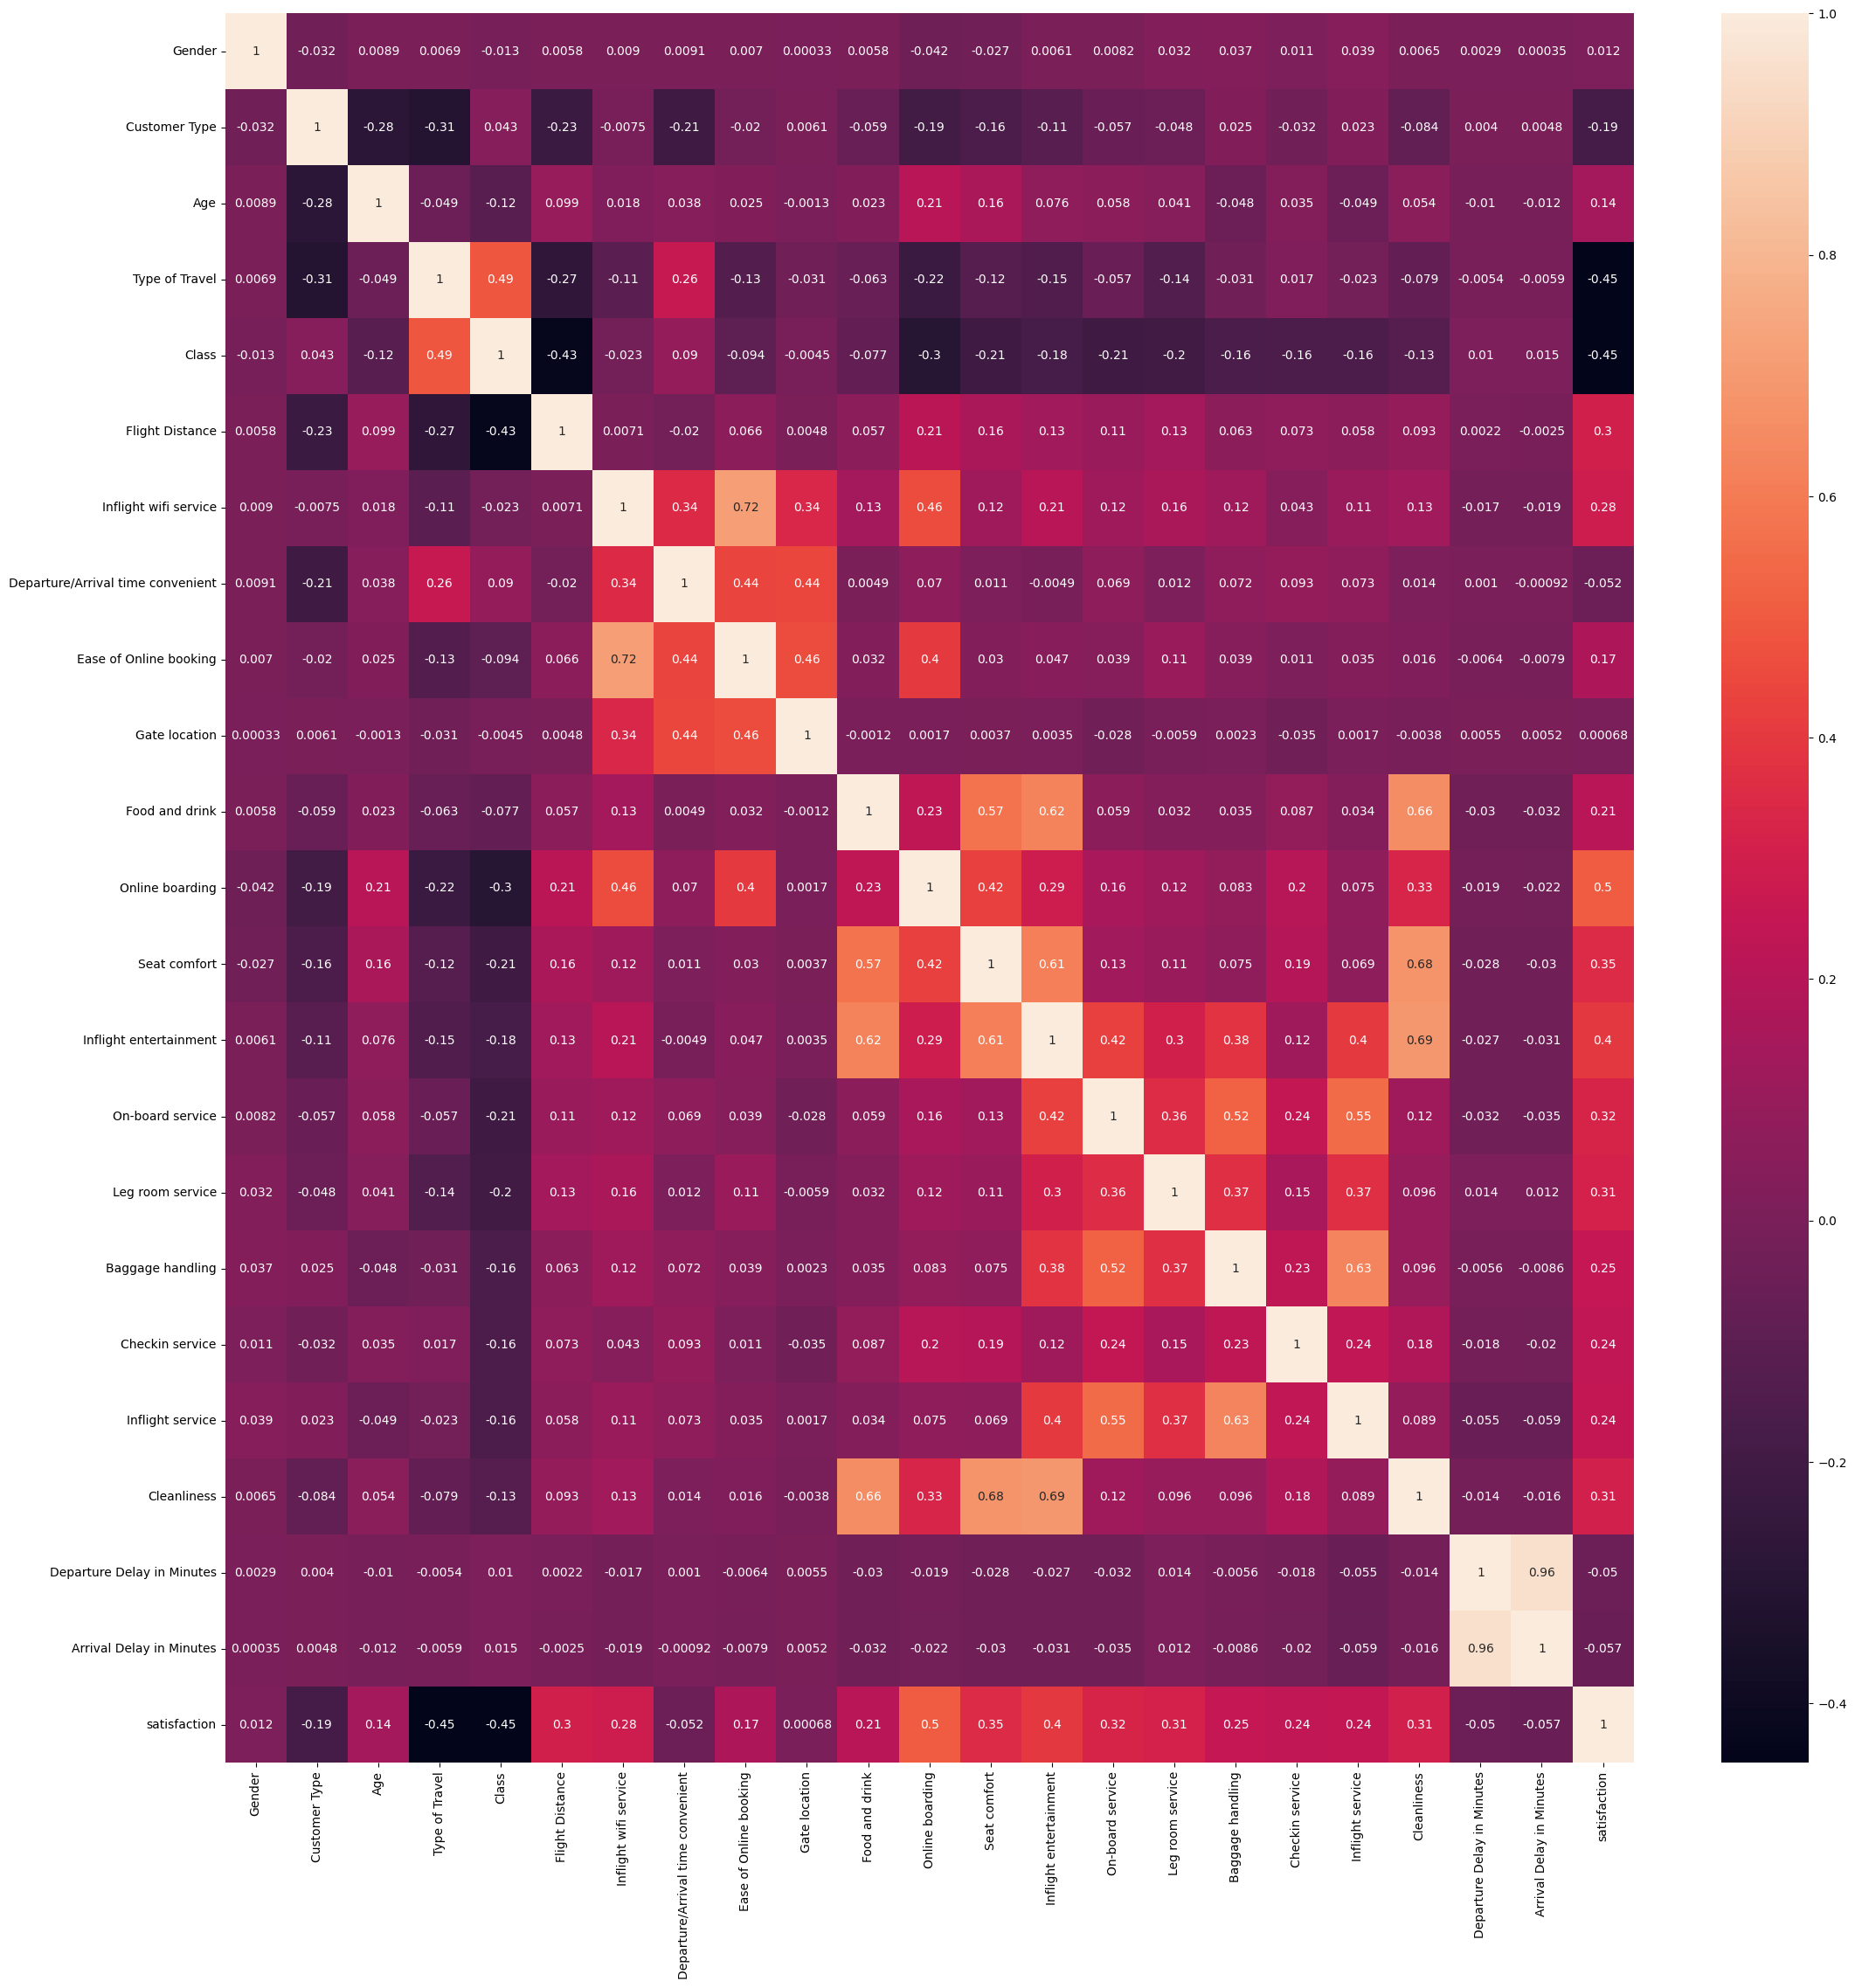

In [92]:
corm = train.corr()
plt.figure(figsize=(26,26))
sns.heatmap(corm, annot=True)

The 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' features are important factors that directly impact the overall satisfaction of passengers. That's why I didn't remove them. Moreover, there is no strong correlation between passenger satisfaction and other variables.

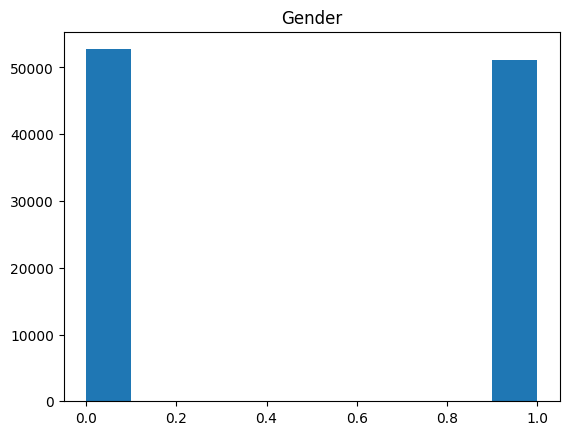

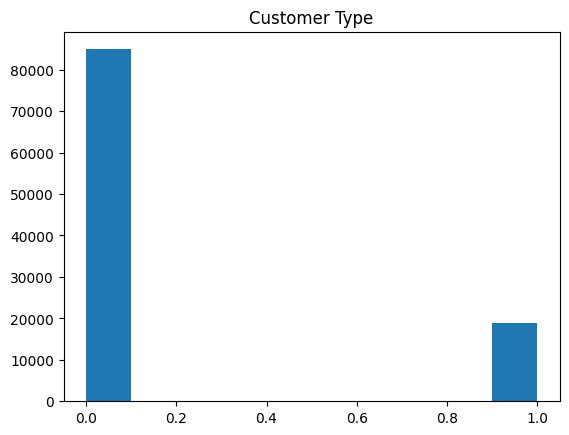

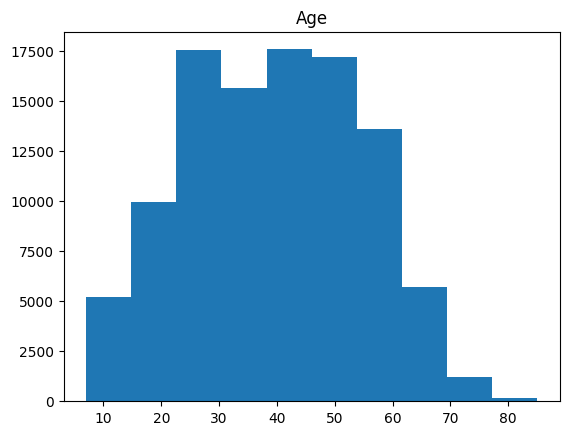

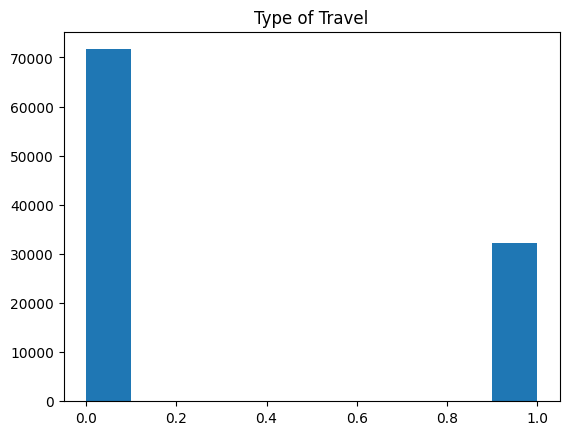

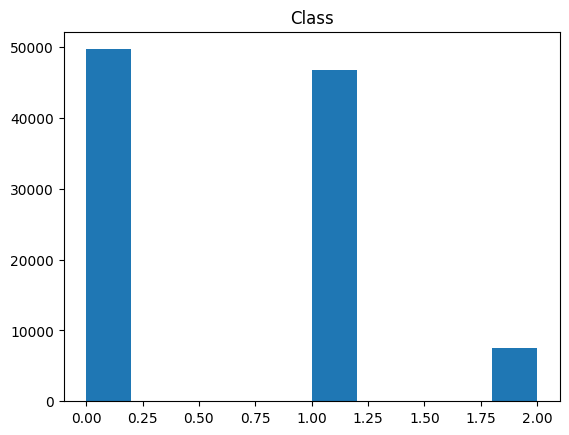

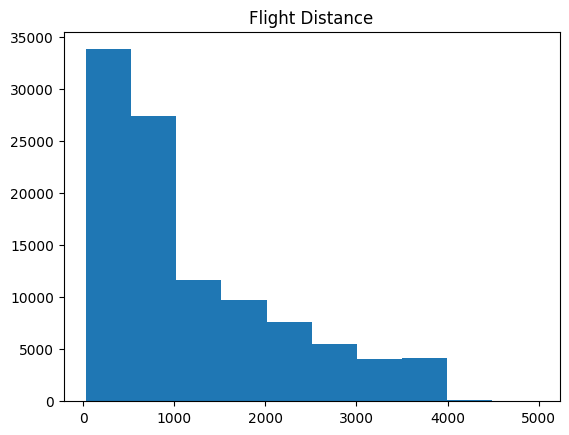

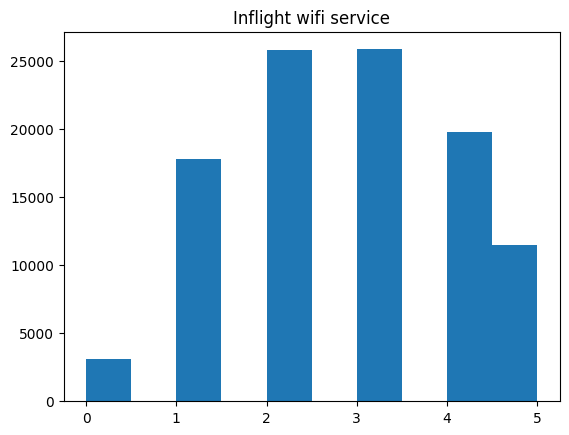

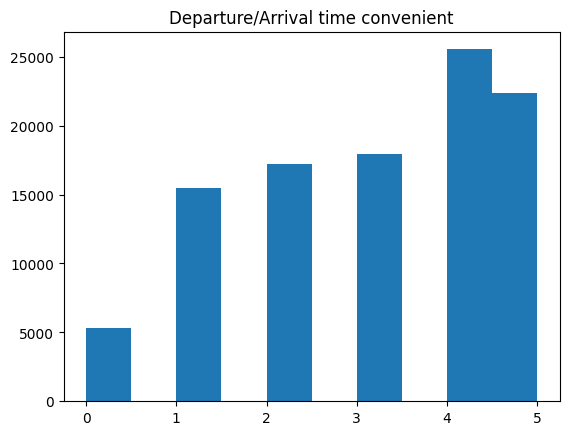

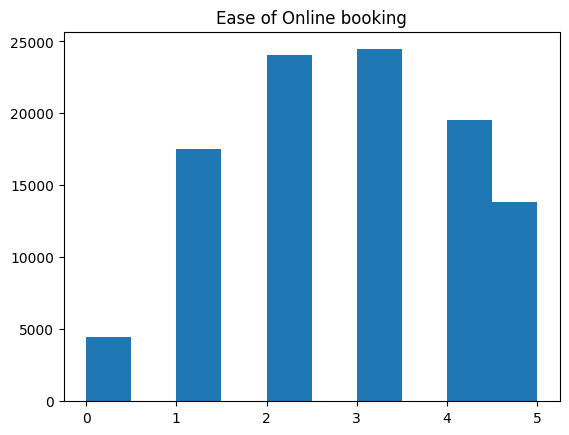

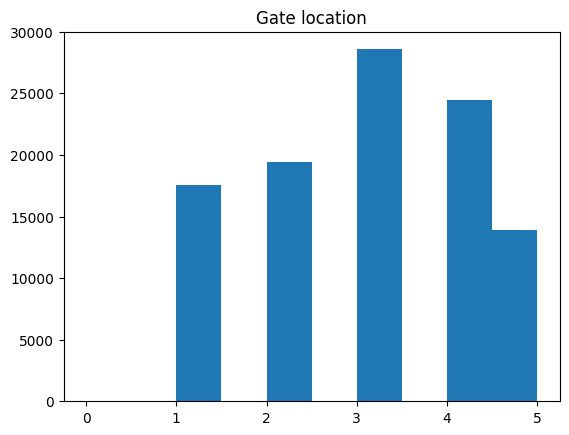

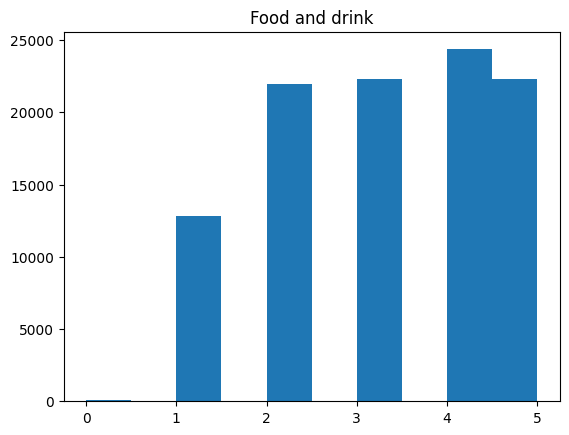

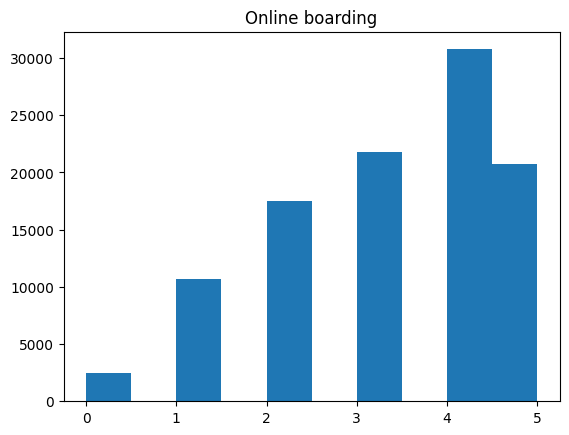

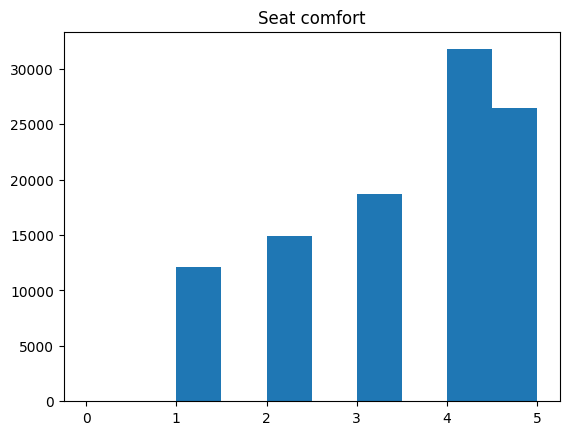

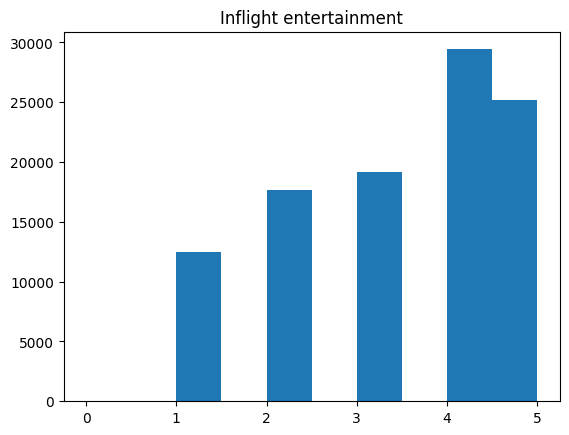

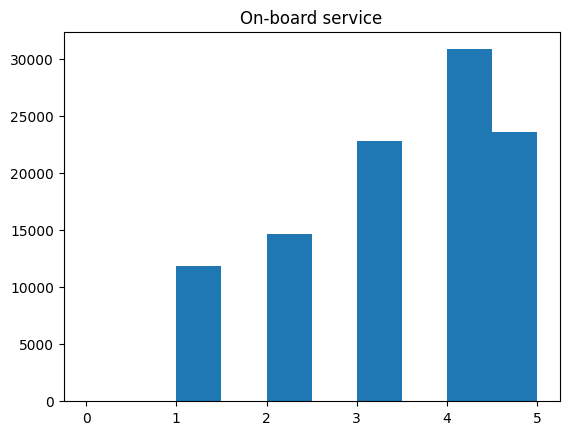

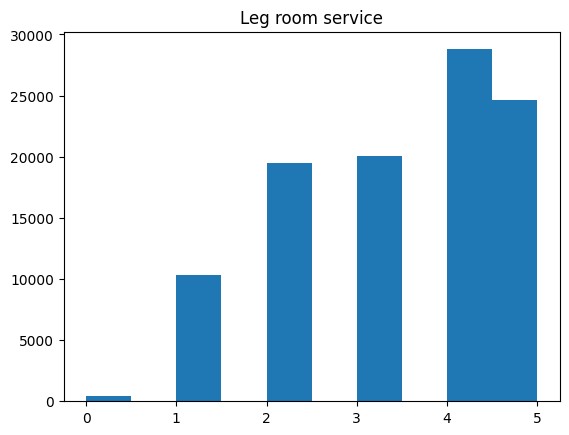

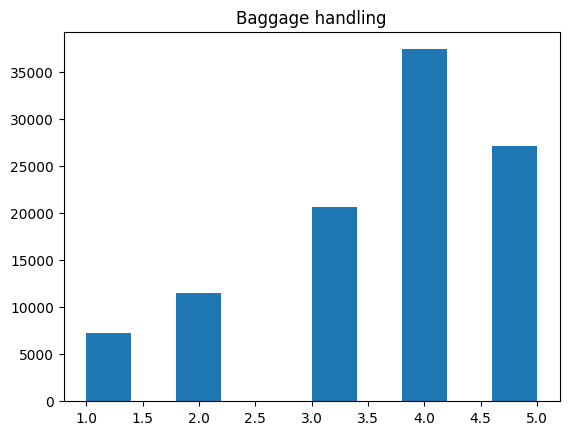

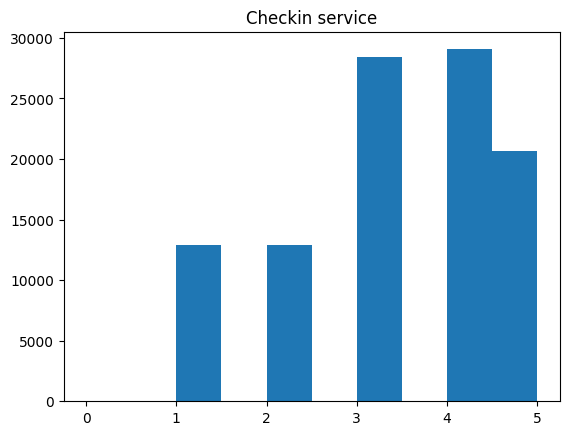

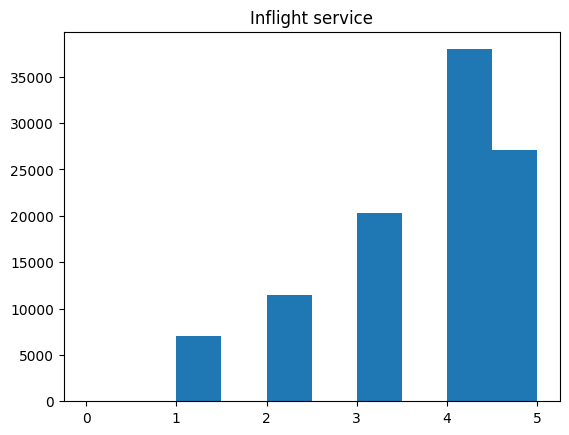

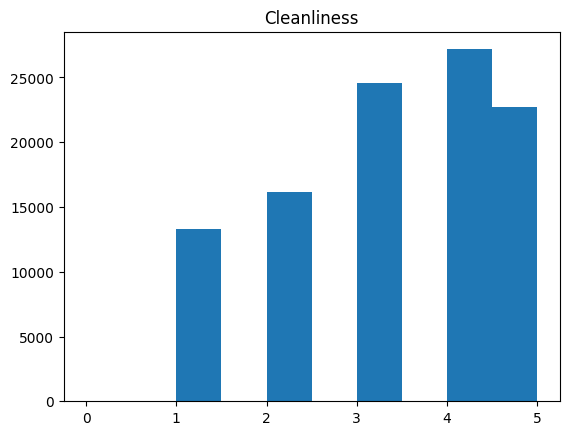

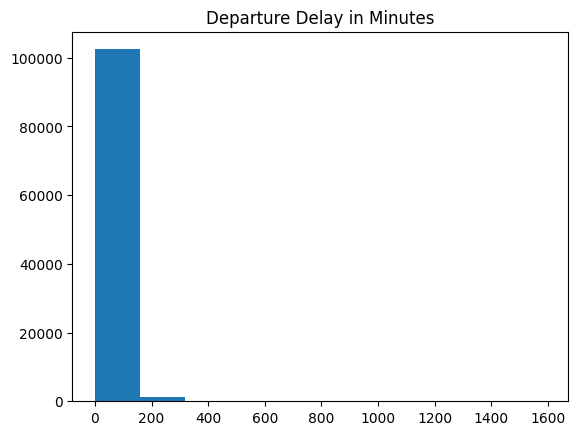

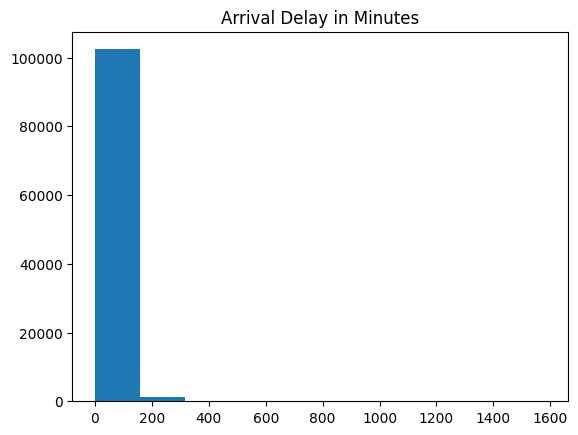

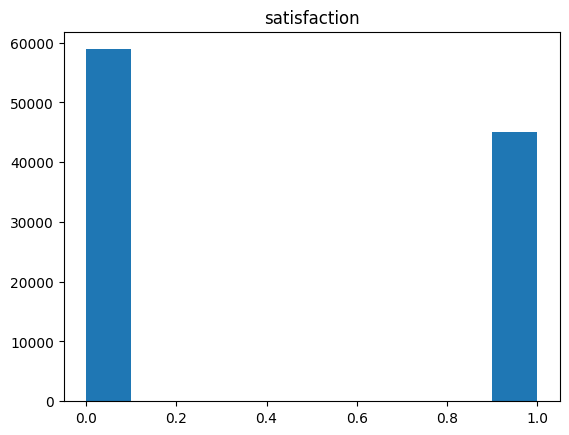

In [93]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(f'{col}')
    plt.show()

<Axes: >

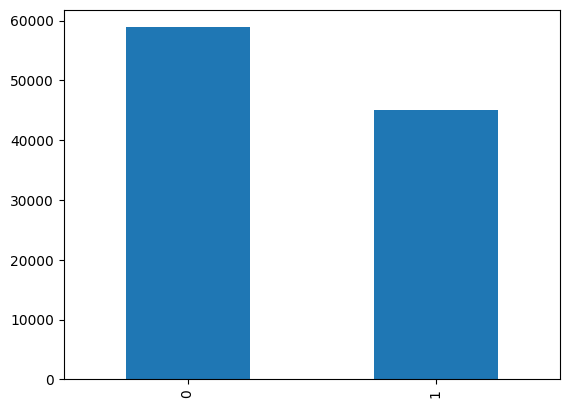

In [94]:
train['satisfaction'].value_counts().plot(kind='bar')

In [95]:
print(train['satisfaction'].value_counts())


0    58879
1    45025
Name: satisfaction, dtype: int64


There seems to be an imbalanced data where the class 1 has less data compared to class 0.

In [96]:
X = train.drop('satisfaction', axis=1)
y = train['satisfaction'] 
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)



In [97]:
print(y_smote.value_counts())

0    58879
1    58879
Name: satisfaction, dtype: int64


After applying SMOTE to the data, the number of samples in class 1 has been increased by synthesizing new samples, and as a result, the data has become balanced.

Split the data into train and test sets

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [99]:
print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)


(94206, 22)
(23552, 22)
(94206,)
(23552,)


 Going to try different classification models and determine which one is the best.

LogisticRegression

In [100]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
pred_ytrain_lr = lr.predict(X_train)
pred_ytest_lr = lr.predict(X_test) 

In [101]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

In [102]:
acc_report(y_train,pred_ytrain_lr)

The accuracy is  0.87
[[41369  5761]
 [ 6239 40837]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     47130
           1       0.88      0.87      0.87     47076

    accuracy                           0.87     94206
   macro avg       0.87      0.87      0.87     94206
weighted avg       0.87      0.87      0.87     94206



In [103]:
acc_report(y_test,pred_ytest_lr)

The accuracy is  0.87
[[10313  1436]
 [ 1570 10233]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     11749
           1       0.88      0.87      0.87     11803

    accuracy                           0.87     23552
   macro avg       0.87      0.87      0.87     23552
weighted avg       0.87      0.87      0.87     23552



The accuracy, precision, and recall scores for the Logistic Regression model are 0.87, 0.88, and 0.87 respectively for both train and test sets. The model performed well with low bias and low variance.

DecisionTree

In [104]:
dtree = DecisionTreeClassifier(max_depth = 7,min_samples_split = 4)
dtree.fit(X_train,y_train)
preds_dtree_train = dtree.predict(X_train)
preds_dtree_test = dtree.predict(X_test)
     

In [105]:
acc_report(y_train,preds_dtree_train)

The accuracy is  0.93
[[43590  3540]
 [ 3294 43782]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     47130
           1       0.93      0.93      0.93     47076

    accuracy                           0.93     94206
   macro avg       0.93      0.93      0.93     94206
weighted avg       0.93      0.93      0.93     94206



In [106]:
acc_report(y_test,preds_dtree_test)

The accuracy is  0.93
[[10853   896]
 [  839 10964]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11749
           1       0.92      0.93      0.93     11803

    accuracy                           0.93     23552
   macro avg       0.93      0.93      0.93     23552
weighted avg       0.93      0.93      0.93     23552



Tuning the hyperparameters by setting the maximum depth to 7 and minimum samples split to 4 resulted in the best accuracy of 0.93. Increasing the depth of the tree caused overfitting, making 7 the optimal value. Additionally, the precision, recall, and F1-score were high, with values of 0.93, 0.92, and 0.93, respectively, for both the train and test sets. Therefore, this model has low bias and variance.

RandomForest

In [107]:
rf = RandomForestClassifier(n_estimators = 10,max_depth=10, verbose = 1)
rf.fit(X_train,y_train)
preds_rf_train = rf.predict(X_train)
preds_rf_test = rf.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [108]:
acc_report(y_train,preds_rf_train)

The accuracy is  0.94
[[44627  2503]
 [ 3113 43963]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     47130
           1       0.95      0.93      0.94     47076

    accuracy                           0.94     94206
   macro avg       0.94      0.94      0.94     94206
weighted avg       0.94      0.94      0.94     94206



In [109]:
acc_report(y_test,preds_rf_test)

The accuracy is  0.94
[[11110   639]
 [  859 10944]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11749
           1       0.94      0.93      0.94     11803

    accuracy                           0.94     23552
   macro avg       0.94      0.94      0.94     23552
weighted avg       0.94      0.94      0.94     23552



Tuning the hyperparameters by setting the estimators to 10 and maximum depth also to 10 resulted in the best accuracy of 0.94.Increasing the depth of the tree caused overfitting. Additionally, the precision, recall, and F1-score were high, with values of 0.93, 0.95, and 0.94.This model has low bias and variance.

K-Nearest Neighbors (KNN)

In [110]:
knn=KNeighborsClassifier(n_neighbors=322)
knn.fit(X_train,y_train)
preds_ytrain_knn=knn.predict(X_train)
preds_ytest_knn=knn.predict(X_test)

In [111]:
acc_report(y_train,preds_ytrain_knn)

The accuracy is  0.68
[[33985 13145]
 [17096 29980]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69     47130
           1       0.70      0.64      0.66     47076

    accuracy                           0.68     94206
   macro avg       0.68      0.68      0.68     94206
weighted avg       0.68      0.68      0.68     94206



In [112]:
acc_report(y_test,preds_ytest_knn)

The accuracy is  0.67
[[8470 3279]
 [4379 7424]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69     11749
           1       0.69      0.63      0.66     11803

    accuracy                           0.67     23552
   macro avg       0.68      0.67      0.67     23552
weighted avg       0.68      0.67      0.67     23552



I set the k value as the square root of the total number of data points in the dataset, which is 322. However, the resulting accuracy score of 0.68 is poor, and the precision, recall, and f1-score are also low, indicating that the model is underfitting and has high bias and low variance

Support Vector Machines (SVM)

In [123]:
svc=SVC(kernel='rbf',degree=4)
svc.fit(X_train,y_train)
svc_preds_train=svc.predict(X_train)
svc_preds_test=svc.predict(X_test)

In [124]:
acc_report(y_train,svc_preds_train)

The accuracy is  0.65
[[37809  9321]
 [24010 23066]]
              precision    recall  f1-score   support

           0       0.61      0.80      0.69     47130
           1       0.71      0.49      0.58     47076

    accuracy                           0.65     94206
   macro avg       0.66      0.65      0.64     94206
weighted avg       0.66      0.65      0.64     94206



In [125]:
acc_report(y_test,svc_preds_test)

The accuracy is  0.64
[[9432 2317]
 [6049 5754]]
              precision    recall  f1-score   support

           0       0.61      0.80      0.69     11749
           1       0.71      0.49      0.58     11803

    accuracy                           0.64     23552
   macro avg       0.66      0.65      0.64     23552
weighted avg       0.66      0.64      0.64     23552



Support Vector Machines (SVM) has accuracy score of 0.65 is poor, and the precision, recall, and f1-score are also low, indicating that the model is underfitting and has high bias and low variance

Naive Bayes

In [113]:
gb=GaussianNB()
gb.fit(X_train,y_train)
gb_preds_train_smote=gb.predict(X_train)
gb_preds_test_smote=gb.predict(X_test)

In [114]:
acc_report(y_train,gb_preds_train_smote)

The accuracy is  0.86
[[42063  5067]
 [ 8092 38984]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     47130
           1       0.88      0.83      0.86     47076

    accuracy                           0.86     94206
   macro avg       0.86      0.86      0.86     94206
weighted avg       0.86      0.86      0.86     94206



In [115]:
acc_report(y_test,gb_preds_test_smote)

The accuracy is  0.86
[[10498  1251]
 [ 1991  9812]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     11749
           1       0.89      0.83      0.86     11803

    accuracy                           0.86     23552
   macro avg       0.86      0.86      0.86     23552
weighted avg       0.86      0.86      0.86     23552



Naive Bayes doesn't have any hyperparameters to tune during training. The accuracy is 0.86, while the precision, recall, and f1-score are 0.84, 0.89, and 0.87, respectively. The model has low bias and low variance

AdaBoost

In [116]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=15, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_train= ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [117]:
acc_report(y_train,y_pred_train)

The accuracy is  0.95
[[45049  2081]
 [ 2416 44660]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     47130
           1       0.96      0.95      0.95     47076

    accuracy                           0.95     94206
   macro avg       0.95      0.95      0.95     94206
weighted avg       0.95      0.95      0.95     94206



In [118]:
acc_report(y_test,y_pred_test)

The accuracy is  0.95
[[11220   529]
 [  681 11122]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11749
           1       0.95      0.94      0.95     11803

    accuracy                           0.95     23552
   macro avg       0.95      0.95      0.95     23552
weighted avg       0.95      0.95      0.95     23552



AdaBoostClassifier an accuracy of 0.95 for both the train and test datasets.The precision, recall, and F1-score values are also high, indicating that the model is performing well and has low bias and low variance.

XGBoost

In [119]:
xgb = XGBClassifier(se_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=40, random_state=42)
xgb.fit(X_train, y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)


[17:35:33] WARNING: ../src/learner.cc:767: 
Parameters: { "se_estimator" } are not used.



In [120]:
acc_report(y_train,y_pred_train_xgb)

The accuracy is  0.96
[[45856  1274]
 [ 2247 44829]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     47130
           1       0.97      0.95      0.96     47076

    accuracy                           0.96     94206
   macro avg       0.96      0.96      0.96     94206
weighted avg       0.96      0.96      0.96     94206



In [121]:
acc_report(y_test,y_pred_test_xgb)

The accuracy is  0.96
[[11421   328]
 [  630 11173]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11749
           1       0.97      0.95      0.96     11803

    accuracy                           0.96     23552
   macro avg       0.96      0.96      0.96     23552
weighted avg       0.96      0.96      0.96     23552



Comparison of Classification Models:
XGBoost had the highest accuracy of 0.96, with precision, recall, and F1-score values of 0.95, 0.97, and 0.96, respectively. The second-best model was AdaBoostClassifier, with an accuracy of 0.95 and precision, recall, and F1-score values of 0.94, 0.95, and 0.95. The decision tree and random forest also performed well but with slightly lower accuracy compared to those models. In general, XGBoost was the best-performing model, producing the highest accuracy and the highest precision, recall, and F1-score values. This is likely due to its ability to handle complex data and learn from its mistakes during training.

<Axes: >

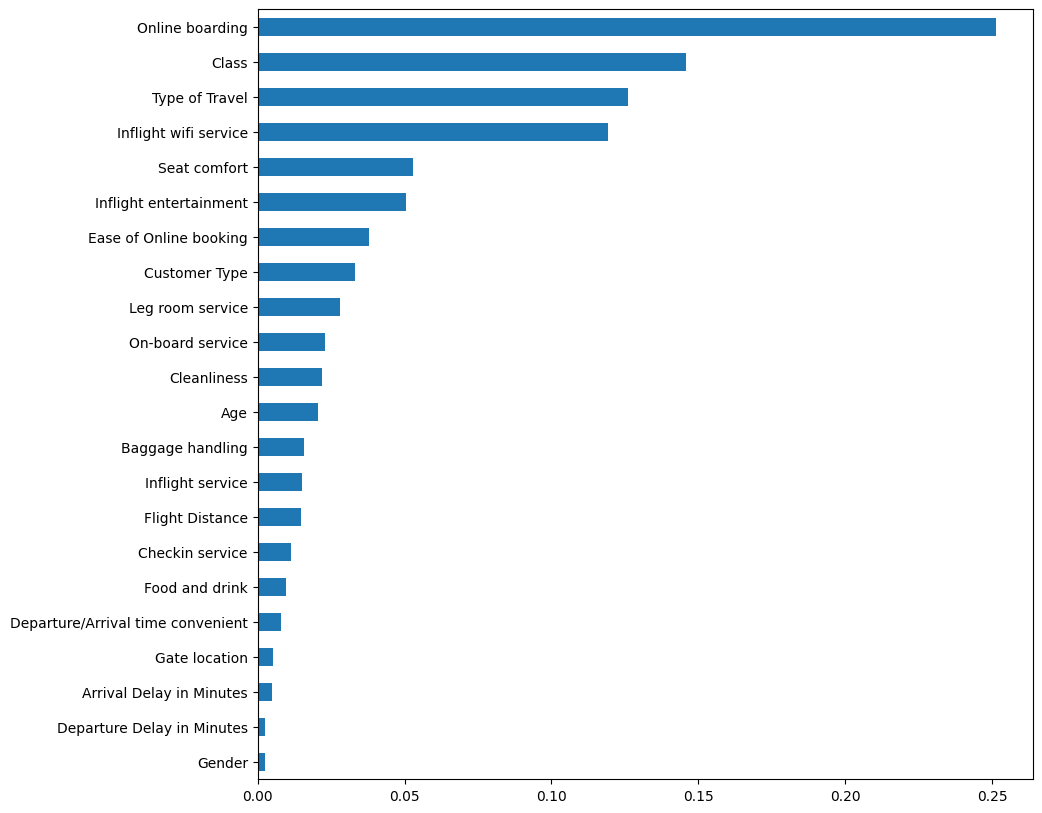

In [122]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values()
importances.plot(kind='barh', figsize=(10,10))

I used feature importance to determine which features were more important for passenger satisfaction.

I have come up with a few solutions.

1.I could see that class is the feature which is a major reason for passenger satisfaction because it reflects the quality of service that passengers receive during their travel. For instance, first-class passengers typically receive more personalized attention, have larger and more comfortable seats, and better quality meals and drinks than economy-class passengers. Thus, passengers who travel in higher classes tend to have a better experience overall, which can impact their satisfaction level. If we try to make some improvements to the economy-class experience, most passengers are likely to be satisfied.


2.The online boarding process allows passengers to complete several tasks before they arrive at the airport, such as checking in, selecting seats, and printing boarding passes. This can save time for them, which is why they are satisfied. If we encourage more people to adopt this process by doing advertisements, then more people are likely to be satisfied.


3.The availability and quality of in-flight amenities like inflight wifi service and inflight entertainment can significantly impact the passenger's overall satisfaction with their travel experience. Passengers expect to have access to entertainment and wifi during their flights to stay connected and entertained, especially during long-haul flights. Therefore, improving the quality of wifi and access to more entertainment will most likely make them satisfied.


4.Departure Delay in Minutes and Arrival Delay in Minutes are the features which are a major cause for customer dissatisfaction. Delayed departures or arrivals can cause inconvenience and lead to missed connections or important events. So the major reason is to change the actual time of the flight according to the season so that passengers won't be dissatisfied.